In [36]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
%matplotlib inline 

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Na_Nap_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Mg_Mgp_Feb.nc"

filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_T_Z3_e_Feb.nc"
#filename3="Nc_Files/Jianfei_WACCMX_files/waccmx_winds_Feb.nc"

M = filename[-10:]
Metal=M[0:2]
#print(Metal)

ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
#ds


In [37]:
time = ds.variables['time']

times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
times

times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
#times2

In [38]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

#M = ds.variables[str(Metal)]
#Mp = ds.variables[str(Metal)+'p']

dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

#Mt[:,1,1,1]
#lev
#dst
#geopH[-1,1,1,1]
#temp

In [39]:
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']

Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)



In [40]:
M_vert = Mtdens.mean(('lat', 'lon'))
Mp_vert = Mptdens.mean(('lat', 'lon'))

M_latlev = Mtdens.mean(('time', 'lon'))
Mp_latlev = Mptdens.mean(('time', 'lon'))

M_lonlev = Mptdens.mean(('time', 'lat'))
Mp_lonlev = Mptdens.mean(('time', 'lat'))

In [41]:
#Sets up lev / alt axes

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

lowest_p = 1*10**-2
highest_p = 5*10**-7

low_ylim_idx = find_nearest(lev, lowest_p)
high_ylim_idx = find_nearest(lev, highest_p)

#print(lev[low_ylim_idx])
#print(lev[high_ylim_idx])

y_lims = [lev[low_ylim_idx], lev[high_ylim_idx]]

lev_plot = lev[high_ylim_idx:low_ylim_idx+1]  #pressure to plot 
#print(lev_plot[:])

alt = np.zeros((lev_plot.size)) 
for i in range(lev_plot.size):
  alt[i] = -7.*math.log(lev_plot[i]/1013.)
#print(alt[:])

def myround(x, base=5):
    return int(base * round(float(x)/base))

up_alt = myround(alt[0],5)
low_alt = myround(alt[-1],5)

alt_diff=up_alt-low_alt
n =((int(alt_diff) / 5 ) + 1)
n = int(n)
locs=np.linspace(low_alt, up_alt, n, dtype=int)

#locs

/tmp/ipykernel_1481896/4041254434.py:22: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks, pad=0.2)


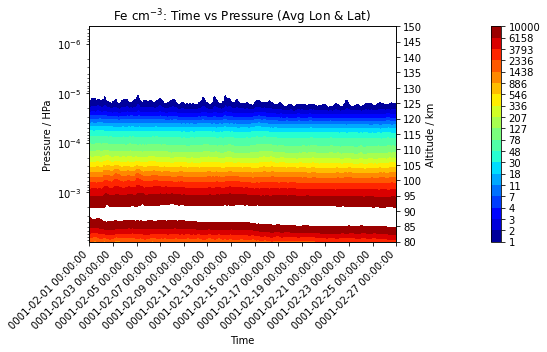

In [50]:
#__M__
#ticks = np.geomspace(6*10**-13, 3*10**-10, num=20, endpoint=True) #vmr
ticks = np.logspace(0, 4, 20,endpoint=True,base=10.0) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2, lev, M_vert, levels=ticks, cmap=jet, norm=colors.LogNorm())

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1])
ax.set_xlabel('Time')

xn = 14
ax.set_xticks(np.linspace(1,672,xn)) 
ax.set_xticklabels(times[::48], rotation=45, ha="right")

ax2 = ax.twinx()
ax2.set_ylabel('Altitude / km')
ax2.set_yticks(np.linspace(0,10,n))
ax2.set_yticklabels(locs[:])

cbar = fig.colorbar(C,ticks=ticks, pad=0.2)
#cbar.set_label(r'cm$^{-3}$')

plt.title(str(Metal)+' cm$^{-3}$: Time vs Pressure (Avg Lon & Lat)')
plt.tight_layout()

#figname=str(Metal)+' cm-3: Time vs Pressure (Avg Lon & Lat)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))

/tmp/ipykernel_1481896/258194310.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  C = ax.contourf(times2, lev, Mp_vert,
/tmp/ipykernel_1481896/258194310.py:24: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks, pad=0.2)


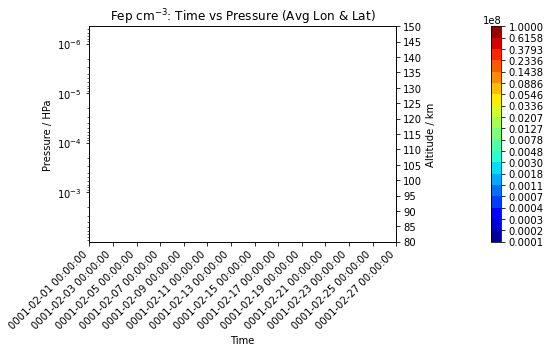

In [51]:
#__Mp__
#ticks = np.geomspace(8*10**-16, 1*10**-8, num=20, endpoint=True) #vmr
ticks = np.logspace(4, 8, 20,endpoint=True,base=10.0) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2, lev, Mp_vert, 
                levels=ticks,  cmap=jet, 
                norm=colors.LogNorm())

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1])
ax.set_xlabel('Time')

xn = 14
ax.set_xticks(np.linspace(1,672,xn)) 
ax.set_xticklabels(times[::48], rotation=45, ha="right")

ax2 = ax.twinx()
ax2.set_ylabel('Altitude / km')
ax2.set_yticks(np.linspace(0,10,n))
ax2.set_yticklabels(locs[:])

cbar = fig.colorbar(C,ticks=ticks, pad=0.2)

plt.title(str(Metal)+'p cm$^{-3}$: Time vs Pressure (Avg Lon & Lat)')
plt.tight_layout()

#figname=str(Metal)+'p cm-3: Time vs Pressure (Avg Lon & Lat)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))

/tmp/ipykernel_1481896/4225299105.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks, pad=0.2)


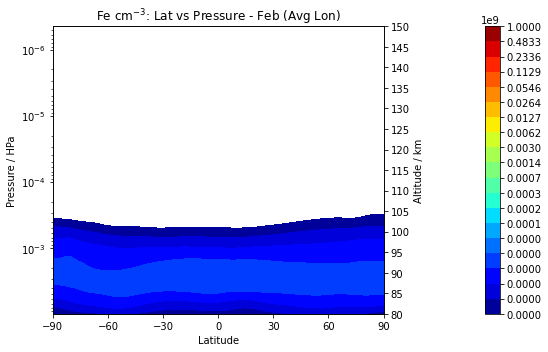

In [52]:
#__M__
#ticks = np.geomspace(1*10**-14, 3*10**-10, num=20, endpoint=True)
ticks = np.logspace(3, 9, 20,endpoint=True,base=10.0) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, M_latlev, 
                levels=ticks,  cmap=jet, 
                norm=colors.LogNorm())

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1])
ax.set_xlabel('Latitude')
ax2 = ax.twinx()
ax2.set_ylabel('Altitude / km')
ax2.set_yticks(np.linspace(0,10,n))
ax2.set_yticklabels(locs[:])
ax2.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])
ax2.set_xlabel('Latitude')

cbar = fig.colorbar(C,ticks=ticks, pad=0.2)

plt.title(str(Metal)+' cm$^{-3}$: Lat vs Pressure - Feb (Avg Lon)')
plt.tight_layout()

#figname=str(Metal)+' cm-3: Lat vs Pressure - Feb (Avg Lon)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))

/tmp/ipykernel_1481896/3493478965.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  C = ax.contourf(lat, lev, Mp_latlev,
/tmp/ipykernel_1481896/3493478965.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks, pad=0.2)


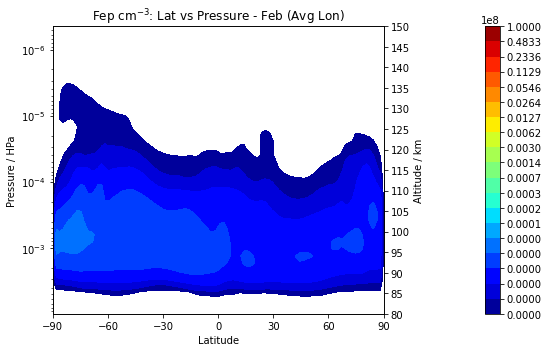

In [53]:
#__Mp__
#ticks = np.geomspace(1*10**-16, 1*10**-8, num=20, endpoint=True)
ticks = np.logspace(2, 8, 20,endpoint=True,base=10.0) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, Mp_latlev, 
                levels=ticks,  cmap=jet, 
                norm=colors.LogNorm())

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1])
ax.set_xlabel('Latitude')
ax2 = ax.twinx()
ax2.set_ylabel('Altitude / km')
ax2.set_yticks(np.linspace(0,10,n))
ax2.set_yticklabels(locs[:])
ax2.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])
ax2.set_xlabel('Latitude')

cbar = fig.colorbar(C,ticks=ticks, pad=0.2)

plt.title(str(Metal)+'p cm$^{-3}$: Lat vs Pressure - Feb (Avg Lon)')
plt.tight_layout()

#figname=str(Metal)+'p cm-3: Lat vs Pressure - Feb (Avg Lon)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))

/tmp/ipykernel_1481896/1330872069.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  C = ax.contourf(lon, lev, M_lonlev,
/tmp/ipykernel_1481896/1330872069.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks, pad=0.2)


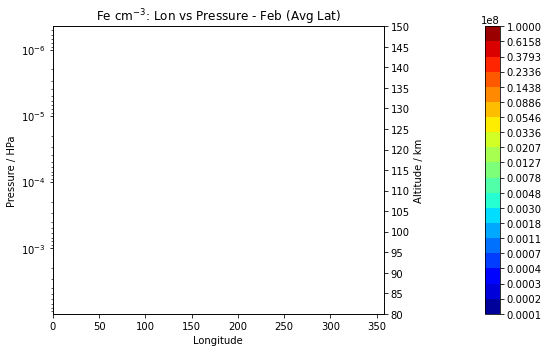

In [54]:
#__M__
#ticks = np.geomspace(5*10**-16, 5*10**-9, num=20, endpoint=True) #vmr
ticks = np.logspace(4, 8, 20,endpoint=True,base=10.0) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lon, lev, M_lonlev, 
                levels=ticks, cmap=jet,  
                norm=colors.LogNorm())

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1])
ax.set_xlabel('Longitude')
ax2 = ax.twinx()
ax2.set_ylabel('Altitude / km')
ax2.set_yticks(np.linspace(0,10,n))
ax2.set_yticklabels(locs[:])
ax2.set_xlabel('Latitude')

cbar = fig.colorbar(C,ticks=ticks, pad=0.2)

plt.title(str(Metal)+' cm$^{-3}$: Lon vs Pressure - Feb (Avg Lat)')
plt.tight_layout()

#figname=str(Metal)+' cm-3: Lon vs Pressure - Feb (Avg Lat)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))

/tmp/ipykernel_1481896/4227670898.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  C = ax.contourf(lon, lev, Mp_lonlev,
/tmp/ipykernel_1481896/4227670898.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks, pad=0.2)


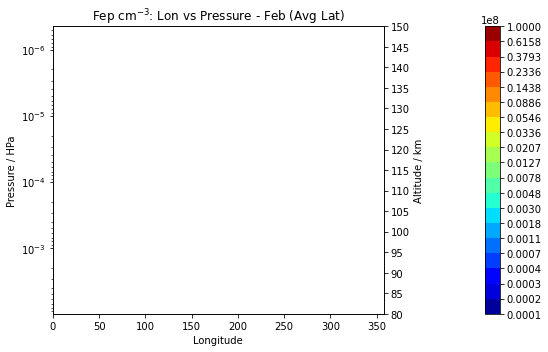

In [55]:
#__Mp__
#ticks = np.geomspace(5*10**-16, 5*10**-9, num=20, endpoint=True) #vmr
ticks = np.logspace(4, 8, 20,endpoint=True,base=10.0) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lon, lev, Mp_lonlev, 
                levels=ticks, cmap=jet,  
                norm=colors.LogNorm())

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1])
ax.set_xlabel('Longitude')
ax2 = ax.twinx()
ax2.set_ylabel('Altitude / km')
ax2.set_yticks(np.linspace(0,10,n))
ax2.set_yticklabels(locs[:])
ax2.set_xlabel('Latitude')

cbar = fig.colorbar(C,ticks=ticks, pad=0.2)

plt.title(str(Metal)+'p cm$^{-3}$: Lon vs Pressure - Feb (Avg Lat)')
plt.tight_layout()

#figname=str(Metal)+'p cm-3: Lon vs Pressure - Feb (Avg Lat)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))